## 1. MNIST 데이터 이해하기
---
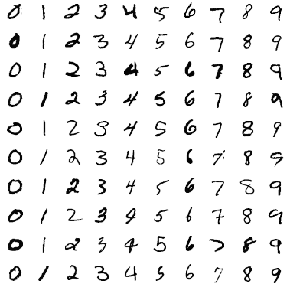
MNIST는 숫자 0부터 9까지의 이미지로 구성된 손글씨 데이터셋이다. 이 데이터는 과거에 우체국에서 편지의 우편번호를 인식하기 위해서 만들어진 훈련 데이터다. 총 60,000개의 훈련 데이터와 레이블, 총 10,000개의 테스트 데이터와 레이블로 구성되어져있다. 레이블은 0부터 9까지 총 10개다. 이 예제는 머신 러닝을 처음 배울 때 접하게 되는 가장 기본적인 예제이기도 한다.<br><br>
MNIST 문제는 손글씨로 적힌 숫자 이미지가 들어오면, 그 이미지가 무슨 숫자인지 맞추는 문제다. 예를 들어 숫자 5의 이미지가 입력으로 들어오면 숫자 5라는 것을 맞춰야한다. 이 문제는 사람에게는 간단하지만 기계에게는 그렇지 않다.<br><br>
우선 MNIST 문제를 더 자세히 본다. 각각의 이미지는 아래와 같이 28픽셀 x 28픽셀의 이미지다.
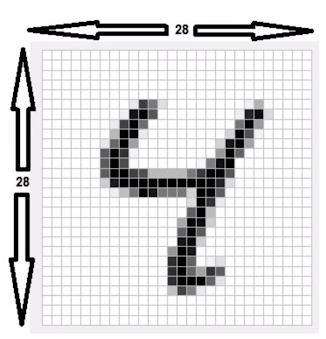
이 문제를 풀기 위해 여기서는 28픽셀 x 28픽셀 = 784 픽셀이므로, 각 이미지를 총 784의 원소를 가진 벡터로 만들어준다. 이렇게 되면 총 784개의 특성을 가진 샘플이 되는데, 이는 앞서 우리가 풀었던 그 어떤 문제들보다 특성이 굉장히 많은 샘플이다.
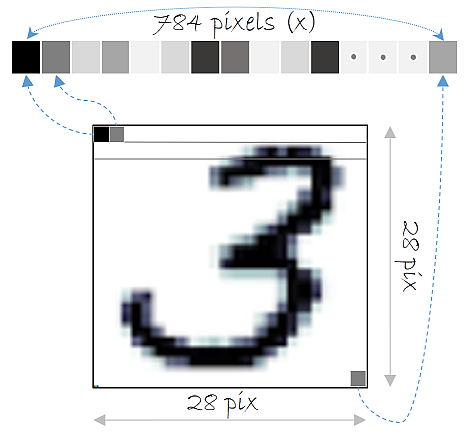

## 2. 토치비전(torchvision) 소개하기
---
본격적인 실습에 들어가기에 앞서 토치비전(torchvision)이라는 도구를 설명한다. torchvision은 유명한 데이터셋들, 이미 구현되어져 있는 유명한 모델들, 일반적인 이미지 전처리 도구들을 포함하고 있는 패키지다. 아래의 링크는 torchvision에 어떤 데이터셋들(datasets)과 모델들(models) 그리고 어떤 전처리 방법들(transforms)을 제공하고 있는지 보여준다.
링크 : https://pytorch.org/docs/stable/torchvision/index.html
- **자연어 처리를 위해서는 토치텍스트(torchtext)라는 패키지가 있다.**

## 3. 분류기 구현을 위한 사전 설정
---

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

현재 환경에서 GPU 연산이 가능하다면 GPU 연산을 하고, 그렇지 않다면 CPU 연산을 하도록 한다.

In [2]:
USE_CUDA = torch.cuda.is_available()

device = torch.device("cuda" if USE_CUDA else "cpu")

print("다음 기기로 학습한다:",device)

다음 기기로 학습한다: cpu


In [3]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [4]:
training_epochs = 15
batch_size = 100

## 4. MNIST 분류기 구현하기
---
torchvision.datasets.dsets.MNIST를 사용하여 MNIST 데이터셋을 불러올 수 있다.


In [5]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



/Users/hongjin-u/opt/anaconda3/envs/Pytorch/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1623459064158/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


첫번째 인자 root는 MNIST 데이터를 다운로드 받을 경로다. 두번째 인자 train은 인자로 True를 주면, MNIST의 훈련 데이터를 리턴받으며 False를 주면 테스트 데이터를 리턴받는다. 세번째 인자 transform은 현재 데이터를 파이토치 텐서로 변환해준다. 네번째 인자 download는 해당 경로에 MNIST 데이터가 없다면 다운로드 받겠다는 의미다.<br><br>
이렇게 데이터를 다운로드했다면 앞서 미니 배치와 데이터로드 챕터에서 학습했던 데이터로더(DataLoader)를 사용한다

In [6]:
data_loader = DataLoader(dataset=mnist_train,
                        batch_size=batch_size,
                        shuffle=True,
                        drop_last=True)

이때 DataLoader에는 4개의 인자가 있다. 첫번째 인자인 dataset은 로드할 대상을 의미하며, 두번째 인자인 batch_size는 배치 크기, shuffle은 매 에포크마다 미니 배치를 셔플할 것인지의 여부, drop_last는 마지막 배치를 버릴 것인지를 의미한다.
- **drop_last를 하는 이유를 이해하기 위해서 1,000개의 데이터가 있다고 했을 때, 배치 크기가 128이라고 해본다. 1,000을 128로 나누면 총 7개가 나오고 나머지로 104개가 남는다. 이때 104개를 마지막 배치로 한다고 했을 때 128개를 충족하지 못하였으므로 104개를 그냥 버릴 수도 있다. 이때 마지막 배치를 버리려면 drop_last=True를 해주면 된다. 이는 다른 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을 막아준다.**<br><br>

이제 모델을 설계한다. input_dim은 784고, output_dim은 10이다.

In [7]:
linear = nn.Linear(784, 10, bias=True).to(device)

```to()```함수는 연산을 어디서 수행할 지를 정한다. to()함수는 모델의 매개변수를 지정한 장치의 메모리로 보낸다. CPU를 사용할 경우에는 필요가 없지만, GPU를 사용하려면 to('cuda')를 해 줄 필요가 있다. 아무것도 지정하지 않은 경우에는 CPU연산이라고 보면 된다.<br><br>
bias는 편향 b를 사용할 것인지를 나타낸다. 기본값은 True이므로 굳이 할 필요는 없지만 명시적으로 True를 해주었다.

In [8]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

- **앞서 소프트맥스 회귀를 배울 때는 torch.nn.functional.cross_entropy()를 사용했으나 여기서는 torch.nn.CrossEntropyLoss()을 사용하고있다. 둘 다 파이토치에서 제공하는 크로스 엔트로피 함수로 둘 다 소프트맥스 함수를 포함하고있다.**

In [9]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print('Epoch: ', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
print('Learning finished')

Epoch:  0001 cost = 0.535150588
Epoch:  0002 cost = 0.359577775
Epoch:  0003 cost = 0.331264287
Epoch:  0004 cost = 0.316404670
Epoch:  0005 cost = 0.307107031
Epoch:  0006 cost = 0.300456554
Epoch:  0007 cost = 0.294933408
Epoch:  0008 cost = 0.290956199
Epoch:  0009 cost = 0.287074089
Epoch:  0010 cost = 0.284515589
Epoch:  0011 cost = 0.281914055
Epoch:  0012 cost = 0.279526889
Epoch:  0013 cost = 0.277636588
Epoch:  0014 cost = 0.275874794
Epoch:  0015 cost = 0.274422735
Learning finished


Accuracy: 0.8883000016212463
Label:  5
Prediction:  5


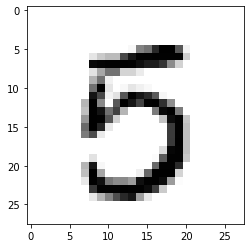

In [15]:
# 테스트 데이터를 사용하여 모델을 테스트
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)
    
    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()